# <center> Projet OpenFood : travail sur le format JSON</center>


## Introduction

Le site https://world.openfoodfacts.org/, propose des données sur des produits alimentaires.

Ce site est alimenté par des consommateurs bénévoles

On peut avoir accès aux données (json) d'un produit si on connaît son **code barre** : regardons le produit de code 3270160860166.
Essayez cette URL : https://fr.openfoodfacts.org/api/v0/produit/3270160860166.json.

Comme vous pouvez le constater il y a énormément de données. Il y a un filtre dans la barre en haut de la fenêtre qui vous permet de rechercher des paramètres particulier. Tout est en anglais. Taper par exemple "sugar". Il y a plusieurs résultats, mais on trouve assez rapidement le paramètre `sugars_100g` qui correspond à la quantité de sucre pour 100g. Il se trouve dans `product` puis dans `nutriments`.

**Le programme suivant affiche le taux de sucre et l'étiquette du produit**

la teneur en sucre de ce produit est de :  32 g pour 100g
https://images.openfoodfacts.org/images/products/762/221/044/9283/nutrition_fr.444.400.jpg


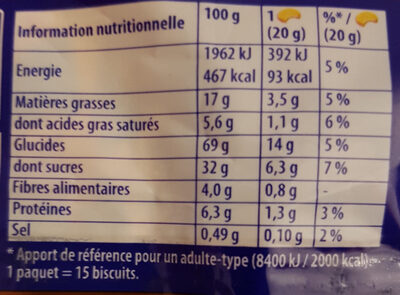

In [1]:
import json
from PIL import Image
import requests
from io import BytesIO

# quelques autres liens
#url_param="https://fr.openfoodfacts.org/api/v0/produit/3029330003533.json"
#url_param="https://fr.openfoodfacts.org/api/v0/produit/00036559.json"

# récupération des données
url_param = "https://fr.openfoodfacts.org/api/v0/produit/7622210449283.json"
r = requests.get(url_param)
reponsedict = json.loads(r.text)
# accès au produit, aux ingrédients puis à la teneur en sucre et affichage
teneur = reponsedict['product']['nutriments']['sugars_100g']
print("la teneur en sucre de ce produit est de : ",teneur,"g pour 100g")

## Vérification à l'aide de l'étiquette du produit
#récupération de l'url de l'image et affichage
img_url = reponsedict['product']['image_nutrition_url']
print(img_url)
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
img.show()


## Objectif : le calcul du nutriscore

L'objectif est de faire le calcul du nutriscore d'un produit qui n'est pas du fromage, de la matière grasse végétale ou animale, ou une boisson. 

Vous trouverez dans le document à l'adresse suivante : 

https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/reglement-usage

aux pages 20 et 21 les tableaux de calcul du nutriscore.

Vous allez faire une programmation fonctionnelle en complétant les différentes fonctions ci-dessous.

In [2]:
def densité_énergétique(produit):
    "Renvoie la densité énergétique d'un produit"
    url_param = "https://fr.openfoodfacts.org/api/v0/produit/"+str(produit)+".json"
    r = requests.get(url_param)
    reponsedict = json.loads(r.text)
    return reponsedict['product']['nutriments']['energy_100g']
print(reponsedict['product']['nutriments']['energy_100g'])

def points_densité_énergétique(produit):
    "Renvoie les points attribués pour la densité énergétique"
    if reponsedict['product']['nutriments']['energy_100g'] <= 335:
        return 0
    if reponsedict['product']['nutriments']['energy_100g'] > 335 and reponsedict['product']['nutriments']['energy_100g'] < 670:
        return 1
    if reponsedict['product']['nutriments']['energy_100g'] > 670 and reponsedict['product']['nutriments']['energy_100g'] < 1005:
        return 2
    if reponsedict['product']['nutriments']['energy_100g'] > 1005 and reponsedict['product']['nutriments']['energy_100g'] < 1340:
        return 3
    if reponsedict['product']['nutriments']['energy_100g'] > 1340 and reponsedict['product']['nutriments']['energy_100g'] < 1675:
        return 4
    if reponsedict['product']['nutriments']['energy_100g'] > 1675 and reponsedict['product']['nutriments']['energy_100g'] < 2010 :
        return 5
    if reponsedict['product']['nutriments']['energy_100g'] > 2010  and reponsedict['product']['nutriments']['energy_100g'] < 2345:
        return 6
    if reponsedict['product']['nutriments']['energy_100g'] > 2345  and reponsedict['product']['nutriments']['energy_100g'] < 2680:
        return 7
    if reponsedict['product']['nutriments']['energy_100g'] > 2680 and reponsedict['product']['nutriments']['energy_100g'] < 3015:
        return 8
    if reponsedict['product']['nutriments']['energy_100g'] > 3015 and reponsedict['product']['nutriments']['energy_100g'] < 3350:
        return 9
    if reponsedict['product']['nutriments']['energy_100g'] > 3350 :
        return 10
print(points_densité_énergétique(reponsedict['product']['nutriments']['energy_100g']))

1962
5


In [3]:
def graisses_saturées(produit):
    "Renvoie les graisses saturées d'un produit"
    url_param = "https://fr.openfoodfacts.org/api/v0/produit/"+str(produit)+".json"
    r = requests.get(url_param)
    reponsedict = json.loads(r.text)
    return reponsedict['product']['nutriments']['saturated-fat_100g']
print(reponsedict['product']['nutriments']['saturated-fat_100g'])

def points_graisses_saturées(produit):
    "Renvoie les points attribués pour les graisses saturées"
    if reponsedict['product']['nutriments']['saturated-fat_100g'] <= 1:
        return 0
    if reponsedict['product']['nutriments']['saturated-fat_100g'] > 1 and reponsedict['product']['nutriments']['saturated-fat_100g'] < 2:
        return 1
    if reponsedict['product']['nutriments']['saturated-fat_100g'] > 2 and reponsedict['product']['nutriments']['saturated-fat_100g'] < 3:
        return 2
    if reponsedict['product']['nutriments']['saturated-fat_100g'] > 3 and reponsedict['product']['nutriments']['saturated-fat_100g'] < 4:
        return 3
    if reponsedict['product']['nutriments']['saturated-fat_100g'] > 4 and reponsedict['product']['nutriments']['saturated-fat_100g'] < 5:
        return 4
    if reponsedict['product']['nutriments']['saturated-fat_100g'] > 5 and reponsedict['product']['nutriments']['saturated-fat_100g'] < 6 :
        return 5
    if reponsedict['product']['nutriments']['saturated-fat_100g'] > 6  and reponsedict['product']['nutriments']['saturated-fat_100g'] < 7:
        return 6
    if reponsedict['product']['nutriments']['saturated-fat_100g'] > 7  and reponsedict['product']['nutriments']['saturated-fat_100g'] < 8:
        return 7
    if reponsedict['product']['nutriments']['saturated-fat_100g'] > 8 and reponsedict['product']['nutriments']['saturated-fat_100g'] < 9:
        return 8
    if reponsedict['product']['nutriments']['saturated-fat_100g'] > 9 and reponsedict['product']['nutriments']['saturated-fat_100g'] <= 10:
        return 9
    if reponsedict['product']['nutriments']['saturated-fat_100g'] > 10 :
        return 10
print(points_graisses_saturées(reponsedict['product']['nutriments']['saturated-fat_100g']))

5.6
5


In [4]:
def sucres(produit):
    "Renvoie la quantité de sucres d'un produit"
    url_param = "https://fr.openfoodfacts.org/api/v0/produit/"+str(produit)+".json"
    r = requests.get(url_param)
    reponsedict = json.loads(r.text)
    return reponsedict['product']['nutriments']['sugars_100g']
print(reponsedict['product']['nutriments']['sugars_100g'])

def points_sucres(produit):
    "Renvoie les points attribués pour la quantité de sucre"
    if reponsedict['product']['nutriments']['sugars_100g'] <= 4.5:
        return 0
    if reponsedict['product']['nutriments']['sugars_100g'] > 4.5 and reponsedict['product']['nutriments']['sugars_100g'] < 9:
        return 1
    if reponsedict['product']['nutriments']['sugars_100g'] > 9 and reponsedict['product']['nutriments']['sugars_100g'] < 13.5:
        return 2
    if reponsedict['product']['nutriments']['sugars_100g'] > 13.5 and reponsedict['product']['nutriments']['sugars_100g'] < 18:
        return 3
    if reponsedict['product']['nutriments']['sugars_100g'] > 18 and reponsedict['product']['nutriments']['sugars_100g'] < 22.5:
        return 4
    if reponsedict['product']['nutriments']['sugars_100g'] > 22.5 and reponsedict['product']['nutriments']['sugars_100g'] < 27 :
        return 5
    if reponsedict['product']['nutriments']['sugars_100g'] > 27  and reponsedict['product']['nutriments']['sugars_100g'] < 31:
        return 6
    if reponsedict['product']['nutriments']['sugars_100g'] > 31  and reponsedict['product']['nutriments']['sugars_100g'] < 36:
        return 7
    if reponsedict['product']['nutriments']['sugars_100g'] > 36 and reponsedict['product']['nutriments']['sugars_100g'] < 40:
        return 8
    if reponsedict['product']['nutriments']['sugars_100g'] > 40 and reponsedict['product']['nutriments']['sugars_100g'] < 45:
        return 9
    if reponsedict['product']['nutriments']['sugars_100g'] > 45  :
        return 10
print(points_sucres(reponsedict['product']['nutriments']['sugars_100g']))

32
7


In [5]:
def sodium(produit):
    "Renvoie la quantité de sodium d'un produit"
    url_param = "https://fr.openfoodfacts.org/api/v0/produit/"+str(produit)+".json"
    r = requests.get(url_param)
    reponsedict = json.loads(r.text)
    return reponsedict['product']['nutriments']['sodium_100g']
print(reponsedict['product']['nutriments']['sodium_100g'])

def points_sodium(produit):
    "Renvoie les points attribués pour la quantité de sodium"
    if reponsedict['product']['nutriments']['sodium_100g'] <= 90 :
        return 0
    if reponsedict['product']['nutriments']['sodium_100g'] > 90 and reponsedict['product']['nutriments']['sodium_100g'] < 180:
        return 1
    if reponsedict['product']['nutriments']['sodium_100g'] > 180 and reponsedict['product']['nutriments']['sodium_100g'] < 270:
        return 2
    if reponsedict['product']['nutriments']['sodium_100g'] > 270 and reponsedict['product']['nutriments']['sodium_100g'] < 360:
        return 3
    if reponsedict['product']['nutriments']['sodium_100g'] > 360 and reponsedict['product']['nutriments']['sodium_100g'] < 450:
        return 4
    if reponsedict['product']['nutriments']['sodium_100g'] > 450 and reponsedict['product']['nutriments']['sodium_100g'] < 540:
        return 5
    if reponsedict['product']['nutriments']['sodium_100g'] > 540 and reponsedict['product']['nutriments']['sodium_100g'] < 630:
        return 6
    if reponsedict['product']['nutriments']['sodium_100g'] > 630 and reponsedict['product']['nutriments']['sodium_100g'] < 720:
        return 7
    if reponsedict['product']['nutriments']['sodium_100g'] > 720 and reponsedict['product']['nutriments']['sodium_100g'] < 810:
        return 8
    if reponsedict['product']['nutriments']['sodium_100g'] > 810 and reponsedict['product']['nutriments']['sodium_100g'] < 810:
        return 9
    if reponsedict['product']['nutriments']['sodium_100g'] > 900 :
        return 10
print(points_sodium(reponsedict['product']['nutriments']['sodium_100g']))

0.196
0


In [6]:
def composante_négative(produit):
    "Renvoie la composante négative d'un produit"
    return points_densité_énergétique(produit) + points_graisses_saturées(produit) + points_sucres(produit) + points_sodium(produit)
print(composante_négative(reponsedict['product']))

17


In [7]:
def fruits_et_autres(produit):
    "Renvoie le % de fruits, légumes, légumineuses, fruits à coque, huiles de colza, de noix et d'olive"
    url_param = "https://fr.openfoodfacts.org/api/v0/produit/"+str(produit)+".json"
    r = requests.get(url_param)
    reponsedict = json.loads(r.text)
    return reponsedict['product']['nutriscore_data']['fruits_vegetables_nuts_colza_walnut_olive_oils']
print(reponsedict['product']['nutriscore_data']['fruits_vegetables_nuts_colza_walnut_olive_oils'])

def points_fruits_et_autres(produit):
    "Renvoie les points pour fruits et autres"
    if reponsedict['product']['nutriscore_data']['fruits_vegetables_nuts_colza_walnut_olive_oils'] <= 40:
        return 0
    if reponsedict['product']['nutriscore_data']['fruits_vegetables_nuts_colza_walnut_olive_oils'] > 40 and reponsedict['product']['nutriments']['fruits_vegetables_nuts_colza_walnut_olive_oils'] < 60:
        return 1
    if reponsedict['product']['nutriscore_data']['fruits_vegetables_nuts_colza_walnut_olive_oils'] > 60 and reponsedict['product']['nutriments']['fruits_vegetables_nuts_colza_walnut_olive_oils'] < 80:
        return 2
    if reponsedict['product']['nutriscore_data']['fruits_vegetables_nuts_colza_walnut_olive_oils'] > 80 :
        return 5
print(points_fruits_et_autres(reponsedict['product']['nutriscore_data']['fruits_vegetables_nuts_colza_walnut_olive_oils']))

0
0


In [8]:
def fibre(produit):
    "Renvoie la quanité de fibre d'un produit"
    url_param = "https://fr.openfoodfacts.org/api/v0/produit/"+str(produit)+".json"
    r = requests.get(url_param)
    reponsedict = json.loads(r.text)
    return reponsedict['product']['nutriments']['fiber_100g']
print(reponsedict['product']['nutriments']['fiber_100g'])
def points_fibres(produit):
    "Renvoie les points pour les fibres"
    if reponsedict['product']['nutriments']['fiber_100g'] <= 0.9:
        return 0
    if reponsedict['product']['nutriments']['fiber_100g'] > 0.9 and reponsedict['product']['nutriments']['fiber_100g'] < 60:
        return 1
    if reponsedict['product']['nutriments']['fiber_100g'] > 1.9 and reponsedict['product']['nutriments']['fiber_100g'] < 2.8:
        return 2
    if reponsedict['product']['nutriments']['fiber_100g'] > 2.8 and reponsedict['product']['nutriments']['fiber_100g'] <3.7 :
        return 3
    if reponsedict['product']['nutriments']['fiber_100g'] > 3.7 and reponsedict['product']['nutriments']['fiber_100g'] < 4.7:
        return 4
    if reponsedict['product']['nutriments']['fiber_100g'] > 4.7 :
        return 5
print(points_fibres(reponsedict['product']['nutriments']['fiber_100g']))

4
1


In [9]:
def protéines(produit):
    "Renvoie les protéines du produit"
    url_param = "https://fr.openfoodfacts.org/api/v0/produit/"+str(produit)+".json"
    r = requests.get(url_param)
    reponsedict = json.loads(r.text)
    return reponsedict['product']['nutriments']['proteins_100g']
print(reponsedict['product']['nutriments']['proteins_100g'])
def points_protéines(produit):
    "Renvoie les points pour les protéines du produit"
    if reponsedict['product']['nutriments']['proteins_100g'] <= 1.6:
        return 0
    if reponsedict['product']['nutriments']['proteins_100g'] > 1.6 and reponsedict['product']['nutriments']['proteins_100g'] < 3.2:
        return 1
    if reponsedict['product']['nutriments']['proteins_100g'] > 3.2 and reponsedict['product']['nutriments']['proteins_100g'] < 4.8:
        return 2
    if reponsedict['product']['nutriments']['proteins_100g'] > 4.8 and reponsedict['product']['nutriments']['proteins_100g'] <6.4:
        return 3
    if reponsedict['product']['nutriments']['proteins_100g'] > 6.4 and reponsedict['product']['nutriments']['proteins_100g'] < 8:
        return 4
    if reponsedict['product']['nutriments']['proteins_100g'] > 8 :
        return 5
print(points_protéines(reponsedict['product']['nutriments']['proteins_100g']))

6.3
3


In [10]:
def composante_positive(produit):
    "Renvoie la composante positive d'un produit"
    return points_fruits_et_autres(produit) + points_fibres(produit) + points_protéines(produit)
print(composante_positive(reponsedict['product']))

4


In [11]:
def score_nutritionnel(produit):
    "Renvoie le score nutritionnel du produit"    
    return composante_négative(reponsedict['product']) - composante_positive(reponsedict['product']) 

print(score_nutritionnel(reponsedict['product']))

13


In [12]:
def classe(produit):
    "Renvoie la classe du produit : A, B, C, D, E"
    # pdf page 21
    score = score_nutritionnel(produit)
    if score < -1:
        return 'A'
    if score >=0 and score <= 2:
        return 'B'
    if score >=3 and score <= 10:
        return 'C'
    if score >=11 and score <= 18:
        return 'D'
    if score > 19:
        return 'E'
    
print(classe(reponsedict['product']))

D


In [13]:
import json
from PIL import Image
import requests
from io import BytesIO
url_nutriscore = {"A": 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Nutri-score-A.svg/640px-Nutri-score-A.svg.png',
                    "B":'https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Nutri-score-B.svg/640px-Nutri-score-B.svg.png',
                    "C":'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Nutri-score-C.svg/640px-Nutri-score-C.svg.png',
                    "D":'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Nutri-score-D.svg/640px-Nutri-score-D.svg.png',
                    "E":'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Nutri-score-E.svg/640px-Nutri-score-E.svg.png'}


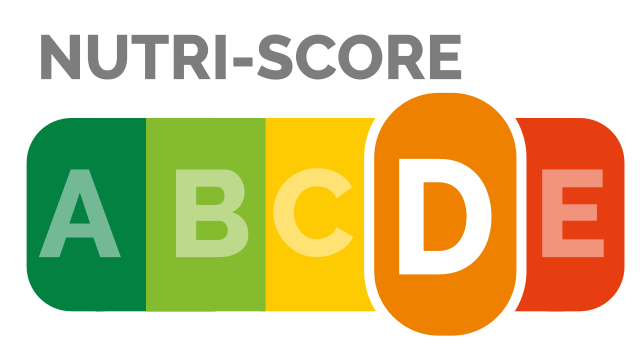

In [17]:
import json
from PIL import Image
import requests
from io import BytesIO
def img_score(produit):
    "Renvoie la classe du produit : A, B, C, D, E"
    image = classe(produit)
    if image == 'A':
         img_nutri = url_nutriscore["A"]
    if image == 'B':
         img_nutri = url_nutriscore["B"]
    if image == 'C':
         img_nutri = url_nutriscore["C"]
    if image == 'D':
         img_nutri = url_nutriscore["D"]
    if image == 'E':
          img_nutri =  url_nutriscore["E"]
    
    response = requests.get(img_nutri)    
    img = Image.open(BytesIO(response.content))
    img.show()
    
img_score('product')